# Outlier detection using Multidimensional Scaling (MDS)

Multidimensional scaling (MDS) is one method for comparing the similarity of samples--similar to PCA. MDS based on euclidean distance will also have identical results to PCA, because minimizing linear distance between points is effectively the same as maximizing linear correlation (the latter being what PCA does). 

See StatQuest's very helpful [video](https://www.youtube.com/watch?v=GEn-_dAyYME) on MDS and PCoA for more details.

```methylcheck``` allows users the option of filtering their data based on the results of MDS. The standard cut off is 1.5 standard deviations from the mean of the data, however users have the ability to adjust the cut off value if they are not satisfied by the filtering. After examining the MDS plot, press 'enter' to accept the cut-off as it is, or enter a new value and rerun the plot. 

We will walk through an example of how to use MDS with this dataset from GEO: [GSE111629](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE111629). This is a large dataset (n=571) of patients with Parkinson's Disease (n=335) and a group of controls (n=237). These blood samples were run on Illumina's 450k arrays. 

We downloaded the data from GEO and processed it with `methylprep` using the following command:

```shell
>>> python -m methylprep process -d <filepath> --all
```

**WARNING:** This is a huge dataset and `methylprep` will take +8 hours to process it. It will also eat up a lot of storage on your machine. We chose this data because it demonstrates the utility of the MDS function. We recommend users pick a different dataset to follow along this example!

In [1]:
import methylcheck
import pandas as pd
from pathlib import Path
filepath = Path('/Users/patriciagirardi/methylcheck_tutorial')


In [2]:
df = pd.read_pickle('~/methylcheck_tutorial/beta_values.pkl')
metadata = pd.read_pickle('~/methylcheck_tutorial/GSE111629_GPL13534_meta_data.pkl')
metadata.head()

,GSM_ID,Sample_Name,source,platform,title,disease state,age,gender,ethnicity,tissue,Sample_ID,Sentrix_ID,Sentrix_Position,description
0,GSM3035401,genomic DNA from 3999979001_R01C01,X3999979001_R01C01,GPL13534,genomic DNA from 3999979001_R01C01,Parkinson's disease (PD),74,Female,Caucasian,whole blood,3999979001_R01C01,3999979001,R01C01,
1,GSM3035402,genomic DNA from 3999979001_R01C02,X3999979001_R01C02,GPL13534,genomic DNA from 3999979001_R01C02,PD-free control,73,Female,Caucasian,whole blood,3999979001_R01C02,3999979001,R01C02,
2,GSM3035403,genomic DNA from 3999979001_R02C01,X3999979001_R02C01,GPL13534,genomic DNA from 3999979001_R02C01,Parkinson's disease (PD),62,Male,Caucasian,whole blood,3999979001_R02C01,3999979001,R02C01,
3,GSM3035404,genomic DNA from 3999979001_R02C02,X3999979001_R02C02,GPL13534,genomic DNA from 3999979001_R02C02,PD-free control,72,Male,Caucasian,whole blood,3999979001_R02C02,3999979001,R02C02,
4,GSM3035405,genomic DNA from 3999979001_R03C01,X3999979001_R03C01,GPL13534,genomic DNA from 3999979001_R03C01,PD-free control,72,Female,Caucasian,whole blood,3999979001_R03C01,3999979001,R03C01,


INFO:methylcheck.samples.postprocessQC:81518.8 probe(s) [avg per sample] were missing values and removed from MDS calculations; 485512 remaining.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


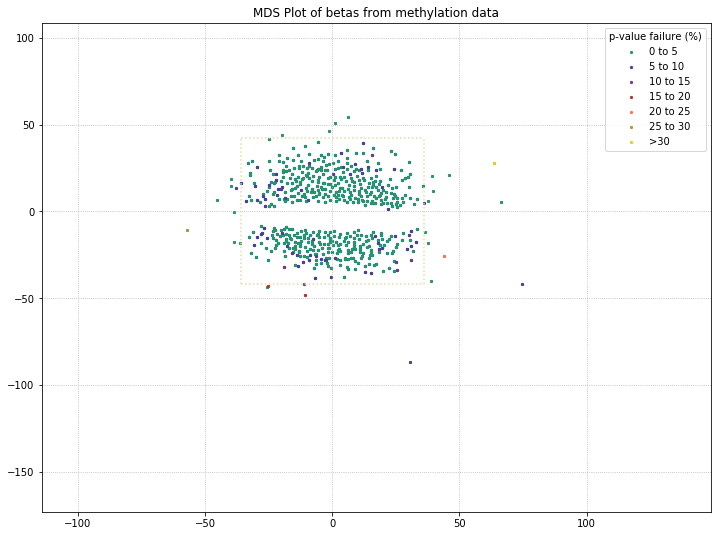

571 original samples; 542 after filtering
Your scale factor was: 2


,3999979001_R01C01,3999979001_R01C02,3999979001_R02C01,3999979001_R02C02,3999979001_R03C01,3999979001_R03C02,3999979001_R04C01,3999979001_R04C02,3999979001_R05C01,3999979001_R05C02,...,9721367028_R01C02,9721367028_R02C02,9721367028_R03C01,9721367028_R03C02,9721367028_R04C01,9721367028_R04C02,9721367028_R05C01,9721367028_R05C02,9721367028_R06C01,9721367028_R06C02
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.586,0.553,0.586,0.551,0.533,0.698,0.713,0.413,0.367,0.655,...,0.706,0.719,0.521,0.643,0.531,0.578,0.518,0.606,NaN,0.532
cg00000108,0.978,0.974,0.972,0.973,0.968,0.973,0.971,0.967,0.970,0.976,...,0.969,0.974,0.970,0.973,0.972,0.968,0.969,0.975,0.966,0.968
cg00000109,0.917,0.925,0.905,0.934,0.922,0.920,0.913,0.918,0.933,0.923,...,0.917,0.929,0.930,0.924,0.930,0.905,0.893,0.912,0.908,0.912
cg00000165,0.221,0.208,NaN,0.185,NaN,NaN,NaN,NaN,0.160,0.209,...,NaN,0.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000236,0.812,0.881,0.867,0.888,0.843,0.852,0.889,0.815,0.809,0.887,...,0.899,0.888,0.902,0.889,0.875,0.836,0.884,0.868,0.882,0.874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,NaN,0.088,NaN,NaN,0.112,NaN,0.102,NaN,NaN,0.118,...,NaN,0.110,0.103,NaN,NaN,NaN,0.104,0.077,NaN,NaN
ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97651759F,0.032,0.030,0.044,0.031,0.029,0.043,0.024,0.038,0.038,0.024,...,0.028,0.025,0.032,0.039,0.041,0.042,0.027,0.027,0.022,0.043


In [3]:
methylcheck.beta_mds_plot(df, filter_stdev=2, poobah=filepath)

There are a few things to note with the MDS plot shown above. We've color-coded the samples in the plot by their poobah value failure rates; the samples with the highest failure rates (yellow, orange) tend to separate from the two clusters. 

The other thing to note is that there are two clusters. With our color-coding scheme, we can only hope that these are the two groups (Parkinson's Disease patients vs. controls). So we need to adjust our color-coding to examine that possibility!

In [4]:
metadata['disease state'].value_counts()

Parkinson's disease (PD)    335
PD-free control             237
Name: disease state, dtype: int64

In [5]:
disease_state = metadata[['Sample_ID', 'disease state']]
disease_labels = dict(zip(disease_state['Sample_ID'], disease_state['disease state']))

There's a small error in the metadata where one of the rows has an empty sample ID column, which will cause an error when we try to plot the mds based on the labels. See below how we call an empty string key from the labels dictionary and still get a value for the disease state. So we'll make sure to drop that key/value pair out from our dictionary before we continue. 

In [6]:
disease_labels['']

"Parkinson's disease (PD)"

In [7]:
del disease_labels['']

Now our dictionary won't error when we try to label samples in our MDS plot, so we can proceed with plotting the control vs. PD color-coding. 

INFO:methylcheck.samples.postprocessQC:81518.8 probe(s) [avg per sample] were missing values and removed from MDS calculations; 485512 remaining.


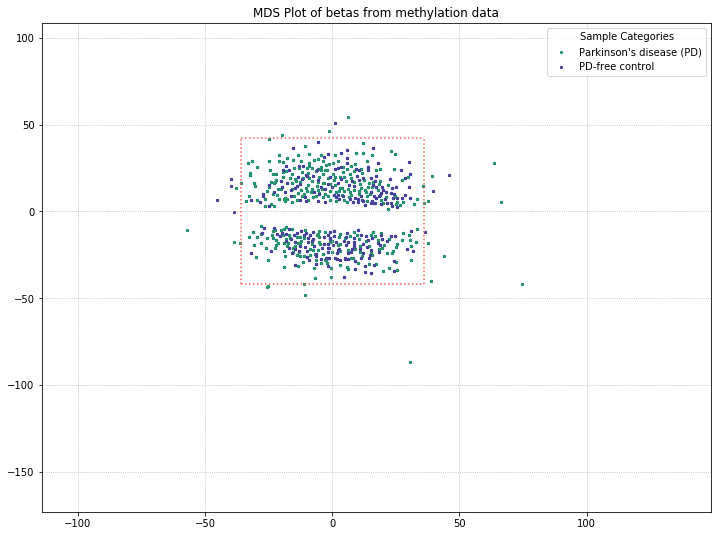

571 original samples; 542 after filtering
Your scale factor was: 2


,3999979001_R01C01,3999979001_R01C02,3999979001_R02C01,3999979001_R02C02,3999979001_R03C01,3999979001_R03C02,3999979001_R04C01,3999979001_R04C02,3999979001_R05C01,3999979001_R05C02,...,9721367028_R01C02,9721367028_R02C02,9721367028_R03C01,9721367028_R03C02,9721367028_R04C01,9721367028_R04C02,9721367028_R05C01,9721367028_R05C02,9721367028_R06C01,9721367028_R06C02
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.586,0.553,0.586,0.551,0.533,0.698,0.713,0.413,0.367,0.655,...,0.706,0.719,0.521,0.643,0.531,0.578,0.518,0.606,NaN,0.532
cg00000108,0.978,0.974,0.972,0.973,0.968,0.973,0.971,0.967,0.970,0.976,...,0.969,0.974,0.970,0.973,0.972,0.968,0.969,0.975,0.966,0.968
cg00000109,0.917,0.925,0.905,0.934,0.922,0.920,0.913,0.918,0.933,0.923,...,0.917,0.929,0.930,0.924,0.930,0.905,0.893,0.912,0.908,0.912
cg00000165,0.221,0.208,NaN,0.185,NaN,NaN,NaN,NaN,0.160,0.209,...,NaN,0.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000236,0.812,0.881,0.867,0.888,0.843,0.852,0.889,0.815,0.809,0.887,...,0.899,0.888,0.902,0.889,0.875,0.836,0.884,0.868,0.882,0.874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,NaN,0.088,NaN,NaN,0.112,NaN,0.102,NaN,NaN,0.118,...,NaN,0.110,0.103,NaN,NaN,NaN,0.104,0.077,NaN,NaN
ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97651759F,0.032,0.030,0.044,0.031,0.029,0.043,0.024,0.038,0.038,0.024,...,0.028,0.025,0.032,0.039,0.041,0.042,0.027,0.027,0.022,0.043


In [8]:
methylcheck.beta_mds_plot(df, filter_stdev=2, labels=disease_labels)

It appears that disease state isn't responsible for the clustering we're seeing here, based on these results. The PD and control patients are evenly interspersed among the two clusters. There might be some other attribute in the metadata responsible for this, though. The best candidate would be something with a binary result in this dataset, like patient gender. So let's examine what the MDS plot looks like when color-coding by patient gender. 

INFO:methylcheck.samples.postprocessQC:81518.8 probe(s) [avg per sample] were missing values and removed from MDS calculations; 485512 remaining.


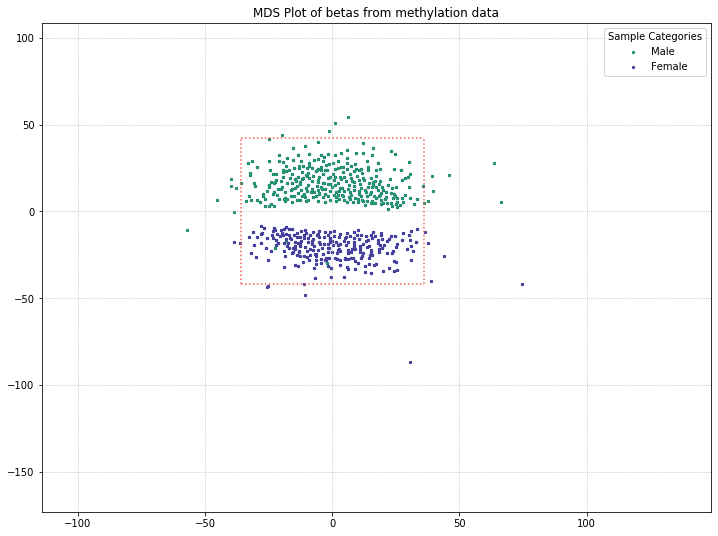

571 original samples; 542 after filtering
Your scale factor was: 2


,3999979001_R01C01,3999979001_R01C02,3999979001_R02C01,3999979001_R02C02,3999979001_R03C01,3999979001_R03C02,3999979001_R04C01,3999979001_R04C02,3999979001_R05C01,3999979001_R05C02,...,9721367028_R01C02,9721367028_R02C02,9721367028_R03C01,9721367028_R03C02,9721367028_R04C01,9721367028_R04C02,9721367028_R05C01,9721367028_R05C02,9721367028_R06C01,9721367028_R06C02
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.586,0.553,0.586,0.551,0.533,0.698,0.713,0.413,0.367,0.655,...,0.706,0.719,0.521,0.643,0.531,0.578,0.518,0.606,NaN,0.532
cg00000108,0.978,0.974,0.972,0.973,0.968,0.973,0.971,0.967,0.970,0.976,...,0.969,0.974,0.970,0.973,0.972,0.968,0.969,0.975,0.966,0.968
cg00000109,0.917,0.925,0.905,0.934,0.922,0.920,0.913,0.918,0.933,0.923,...,0.917,0.929,0.930,0.924,0.930,0.905,0.893,0.912,0.908,0.912
cg00000165,0.221,0.208,NaN,0.185,NaN,NaN,NaN,NaN,0.160,0.209,...,NaN,0.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000236,0.812,0.881,0.867,0.888,0.843,0.852,0.889,0.815,0.809,0.887,...,0.899,0.888,0.902,0.889,0.875,0.836,0.884,0.868,0.882,0.874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,NaN,0.088,NaN,NaN,0.112,NaN,0.102,NaN,NaN,0.118,...,NaN,0.110,0.103,NaN,NaN,NaN,0.104,0.077,NaN,NaN
ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.X.97651759F,0.032,0.030,0.044,0.031,0.029,0.043,0.024,0.038,0.038,0.024,...,0.028,0.025,0.032,0.039,0.041,0.042,0.027,0.027,0.022,0.043


In [9]:
gender = metadata[['Sample_ID', 'gender']]
gender_labels = dict(zip(gender['Sample_ID'], gender['gender']))
del gender_labels['']

methylcheck.beta_mds_plot(df, filter_stdev=2, labels=gender_labels)

It looks like this might be the culprit of the two clusters in the MDS plot! There are a few outliers, but for the most part, the two clusters are made up of one gender each. 

Utilizing one of the functions covered in our Filtering Probes section, we can pull out the beta values from X/Y probes and just examine beta values from probes on the autosomal chromosomes. If MDS is picking up on differences between patient sex and clustering the patients accordingly, we might be able to get at an underlying difference by removing sex from the equation. 

INFO:methylcheck.samples.postprocessQC:79013.0 probe(s) [avg per sample] were missing values and removed from MDS calculations; 473864 remaining.


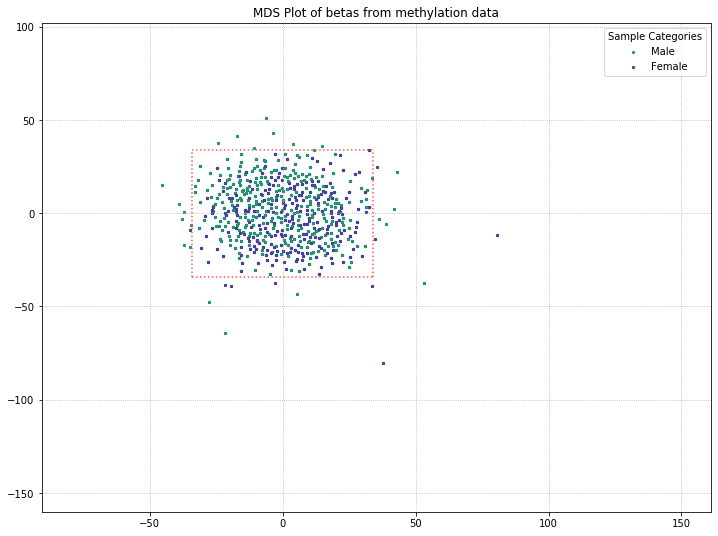

571 original samples; 539 after filtering
Your scale factor was: 2


,3999979001_R01C01,3999979001_R01C02,3999979001_R02C01,3999979001_R02C02,3999979001_R03C01,3999979001_R03C02,3999979001_R04C01,3999979001_R05C01,3999979001_R05C02,3999979001_R06C01,...,9721367028_R01C02,9721367028_R02C02,9721367028_R03C01,9721367028_R03C02,9721367028_R04C01,9721367028_R04C02,9721367028_R05C01,9721367028_R05C02,9721367028_R06C01,9721367028_R06C02
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.586,0.553,0.586,0.551,0.533,0.698,0.713,0.367,0.655,0.695,...,0.706,0.719,0.521,0.643,0.531,0.578,0.518,0.606,NaN,0.532
cg00000108,0.978,0.974,0.972,0.973,0.968,0.973,0.971,0.970,0.976,0.976,...,0.969,0.974,0.970,0.973,0.972,0.968,0.969,0.975,0.966,0.968
cg00000109,0.917,0.925,0.905,0.934,0.922,0.920,0.913,0.933,0.923,0.925,...,0.917,0.929,0.930,0.924,0.930,0.905,0.893,0.912,0.908,0.912
cg00000165,0.221,0.208,NaN,0.185,NaN,NaN,NaN,0.160,0.209,0.265,...,NaN,0.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000236,0.812,0.881,0.867,0.888,0.843,0.852,0.889,0.809,0.887,0.880,...,0.899,0.888,0.902,0.889,0.875,0.836,0.884,0.868,0.882,0.874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.98937537R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.9.98957343R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.9.98959675F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
no_sex_probes = methylcheck.exclude_sex_control_probes(df, array='450k', no_sex=True, no_control=True)

methylcheck.beta_mds_plot(no_sex_probes, filter_stdev=2, labels=gender_labels)

We lost the separation between clusters as a result of pulling out sex probes. There's still a chance that there is some kind of grouping going on with PD/control patients (for example, the top half of the data is all PD patients, while the bottom half is all control patients). So we'll color-code by disease state to verify whether or not there's any grouping going on. 

INFO:methylcheck.samples.postprocessQC:79013.0 probe(s) [avg per sample] were missing values and removed from MDS calculations; 473864 remaining.


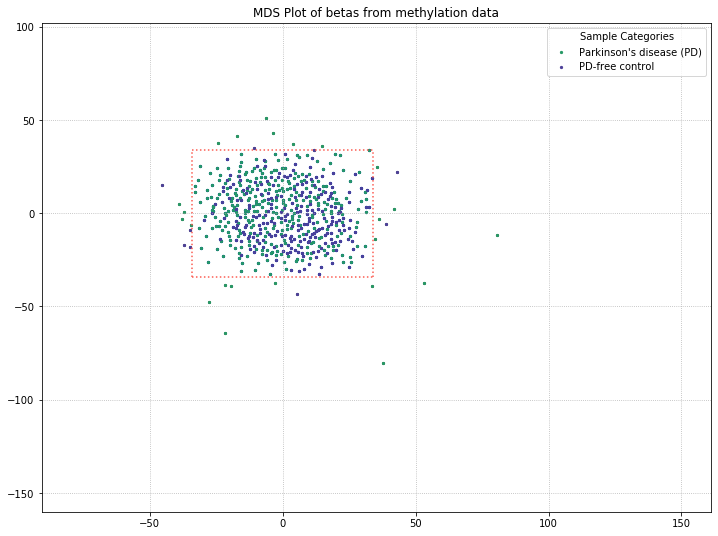

571 original samples; 539 after filtering
Your scale factor was: 2


,3999979001_R01C01,3999979001_R01C02,3999979001_R02C01,3999979001_R02C02,3999979001_R03C01,3999979001_R03C02,3999979001_R04C01,3999979001_R05C01,3999979001_R05C02,3999979001_R06C01,...,9721367028_R01C02,9721367028_R02C02,9721367028_R03C01,9721367028_R03C02,9721367028_R04C01,9721367028_R04C02,9721367028_R05C01,9721367028_R05C02,9721367028_R06C01,9721367028_R06C02
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.586,0.553,0.586,0.551,0.533,0.698,0.713,0.367,0.655,0.695,...,0.706,0.719,0.521,0.643,0.531,0.578,0.518,0.606,NaN,0.532
cg00000108,0.978,0.974,0.972,0.973,0.968,0.973,0.971,0.970,0.976,0.976,...,0.969,0.974,0.970,0.973,0.972,0.968,0.969,0.975,0.966,0.968
cg00000109,0.917,0.925,0.905,0.934,0.922,0.920,0.913,0.933,0.923,0.925,...,0.917,0.929,0.930,0.924,0.930,0.905,0.893,0.912,0.908,0.912
cg00000165,0.221,0.208,NaN,0.185,NaN,NaN,NaN,0.160,0.209,0.265,...,NaN,0.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000236,0.812,0.881,0.867,0.888,0.843,0.852,0.889,0.809,0.887,0.880,...,0.899,0.888,0.902,0.889,0.875,0.836,0.884,0.868,0.882,0.874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.98937537R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.9.98957343R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch.9.98959675F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
methylcheck.beta_mds_plot(no_sex_probes, filter_stdev=2, labels=disease_labels)

It appears that the differences between these two disease states aren't being picked up by MDS in a meaningful way. We'll do one more MDS plot on these filtered probes to check how many of those outlier samples have high detection p-value failure rates.

Also, we can define a variable here to access the samples that pass after they've been filtered by MDS. Then, we can compare that beta distribution to the original beta distribution to see how the MDS filtering affected it. 

INFO:methylcheck.samples.postprocessQC:79013.0 probe(s) [avg per sample] were missing values and removed from MDS calculations; 473864 remaining.


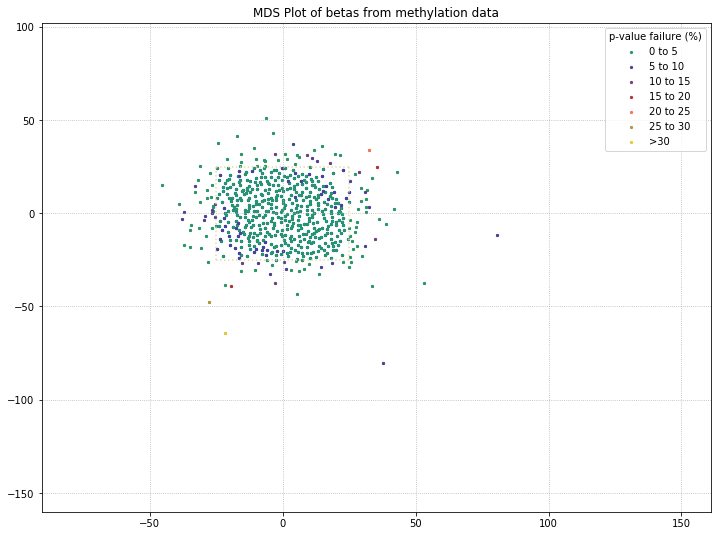

571 original samples; 448 after filtering
Your scale factor was: 1.5


In [13]:
mds_filtered = methylcheck.beta_mds_plot(no_sex_probes, filter_stdev=1.5, poobah=filepath)

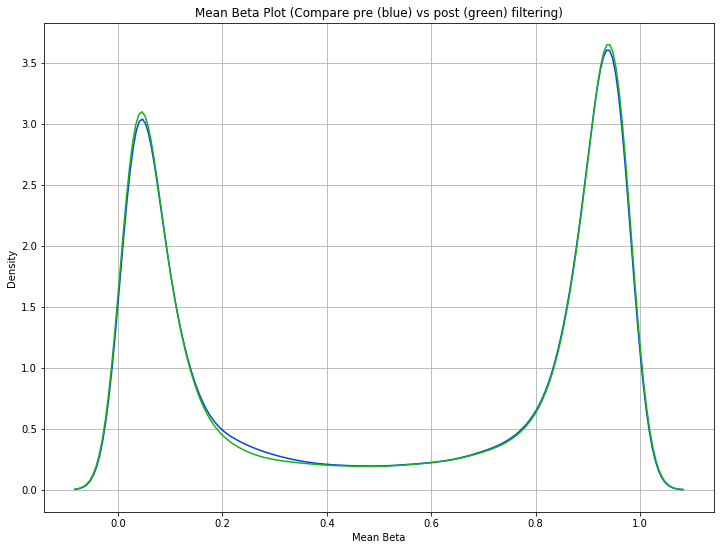

In [14]:
methylcheck.mean_beta_compare(df, mds_filtered)

The difference is a bit subtle since even the low quality data in this dataset is relatively high quality, but you can see that the green curve (MDS filtered samples) has higher and tighter peaks than the blue curve (unfiltered data). This means we were able to eliminate some of the samples that had a lot of beta values falling in that midrange between the peaks. 